In [28]:
import pandas as pd
pd.options.io.excel.xlsx.writer = 'xlsxwriter'

dataset = pd.read_csv(r'./datas/数字化差异性分析数据.csv', index_col=None, header=0, dtype={'股票代码':'object'})
js_dataset = dataset[dataset['上市省份']=='江苏']
print(js_dataset[js_dataset['digital']==1].shape[0])  # 只有236个数据是1，但是我们不提的话或许可以提高准确率。
# js_dataset.reset_index(inplace=True, drop=True)
# 删除不需要的数据
js_dataset = js_dataset.drop(['上市省份'], axis=1)
# js_dataset[js_dataset['digital']==1]
js_dataset

650


,股票代码,截止日期,企业年限,行业类别,权益乘数,速动比率,资本积累率B,固定资产增长率B,营业总收入增长率,销售费用增长率,...,股权性质,两权分离度(%),股权集中度4(%),独董比例,提供岗位增长率,员工收入增长率,研发强度,创新产出,董事会规模,digital
314,000301,2007,7.0,13.0,1.380405,0.668586,-0.006589,-0.273977,0.006221,0.041691,...,1,0.000000,40.2903,0.333333,0.263699,0.166207,2.003051,0.000000,2.302585,0
315,000301,2008,8.0,13.0,1.546510,0.492229,0.082254,-0.350255,-0.463183,-0.710069,...,1,0.000000,41.2454,0.333333,-0.394657,0.166207,2.003051,0.000000,2.302585,0
316,000301,2009,9.0,13.0,1.561810,0.724658,0.006033,-0.143850,-0.085466,0.813145,...,1,0.000000,43.7998,0.400000,0.069272,0.166207,2.003051,0.000000,2.397895,0
317,000301,2010,10.0,60.0,1.470518,1.270975,0.025920,-0.096754,0.233287,-0.668786,...,1,0.000000,41.7098,0.571429,0.028239,0.166207,2.003051,0.000000,2.079442,0
318,000301,2011,11.0,60.0,1.360832,1.019489,0.005543,-0.170452,0.170210,2.126254,...,1,0.000000,39.9150,0.384615,0.009693,0.166207,2.003051,0.000000,2.639057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,870436,2022,1.0,32.0,1.778334,1.436806,-0.097942,-0.056501,-0.382923,-0.163350,...,0,16.988600,76.5233,0.333333,-0.030721,-0.114466,2.284421,4.234107,2.302585,0
26719,871396,2021,1.0,36.0,1.485790,2.525995,0.087010,-0.105547,-0.020185,-0.168257,...,0,5.108174,63.0868,0.250000,0.263699,0.166207,1.619388,2.708050,2.302585,1
26720,871396,2022,2.0,36.0,1.476032,2.110647,0.056330,0.182788,-0.087836,-0.070228,...,0,5.108174,63.0972,0.250000,0.010714,-0.048795,1.733424,3.496508,2.302585,1
26723,871642,2021,0.0,25.0,1.362160,1.854867,0.512965,0.379445,0.104335,0.105209,...,0,0.440000,71.3047,0.428571,0.263699,0.166207,2.512846,2.397895,2.079442,0


In [29]:
from sklearn.model_selection import train_test_split
from utils import normalize

head = ['股票代码','截止日期']
Xnames=['企业年限', '行业类别', '权益乘数', '速动比率', '资本积累率B', '固定资产增长率B', '营业总收入增长率', '销售费用增长率', '管理费用增长率', '现金资产比率', '全部现金回收率', '净利润现金净含量', '营运指数', '资本支出与折旧摊销比', '营业净利率', '销售期间费用率', '投入资本回报率（ROIC）', '成本费用利润率', '应付账款周转率B', '存货周转率B', '应收账款周转率B', '经营杠杆', '财务杠杆', '两职合一', '本期销售额占年度销售总额比例(%)', '本期采购额占年度采购总额比例(%)', '股权性质', '两权分离度(%)', '股权集中度4(%)', '独董比例', '提供岗位增长率', '员工收入增长率', '研发强度', '创新产出', '董事会规模']
Ynames=['digital']
headset = js_dataset[head]
# 对数据进行标准化，数据量有点大，可以尝试单纯拿出江苏省数据先进行分析
# 思路A:是不是可以进一步对全国数据通过行业筛选研究？

X = normalize(js_dataset[Xnames], method='m')
X = pd.DataFrame(X, columns=Xnames)
y = js_dataset[Ynames].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

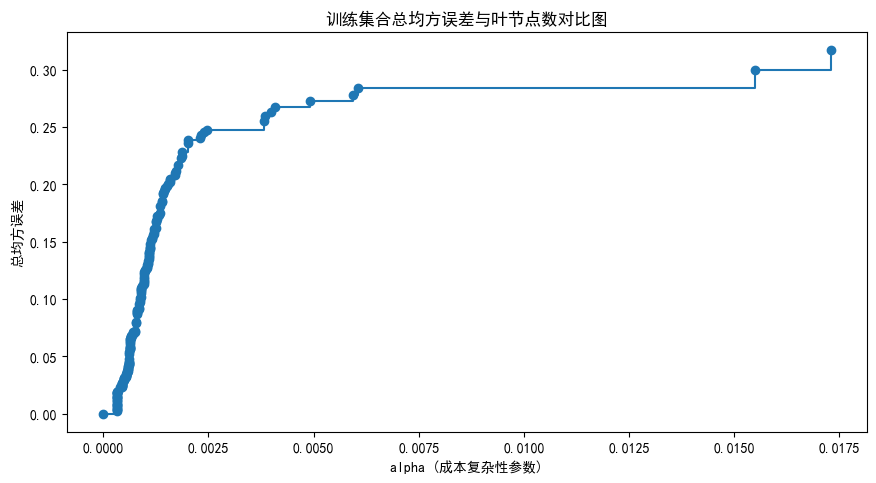

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # 分类树

plt.rcParams['font.sans-serif']= ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']= False    # 用来正常显示负号

fig = plt.figure(figsize=(8, 4),dpi=100)
ax = fig.add_axes([0,0,1,1])

model = DecisionTreeClassifier(random_state=123)
path = model.cost_complexity_pruning_path(X_train, y_train)

ax.plot(path.ccp_alphas, path.impurities, marker='o', drawstyle='steps-post')
ax.set_xlabel('alpha (成本复杂性参数)')
ax.set_ylabel('总均方误差')
plt.title('训练集合总均方误差与叶节点数对比图')
plt.show()

In [7]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 十折交叉验证
param_grid = {'ccp_alpha': path.ccp_alphas}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
model = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv=kfold)
model.fit(X_train, y_train)
print(model.best_params_, model.score(X_test, y_test))
# model = model.best_estimator_
# model = DecisionTreeClassifier(ccp_alpha=0.0028078268782512628, random_state=123)
model = DecisionTreeClassifier(ccp_alpha=param_grid['ccp_alpha'], random_state=132)
model.fit(X_train, y_train)
model.score(X_test, y_test)

{'ccp_alpha': 0.0011110916243821118} 0.822289156626506


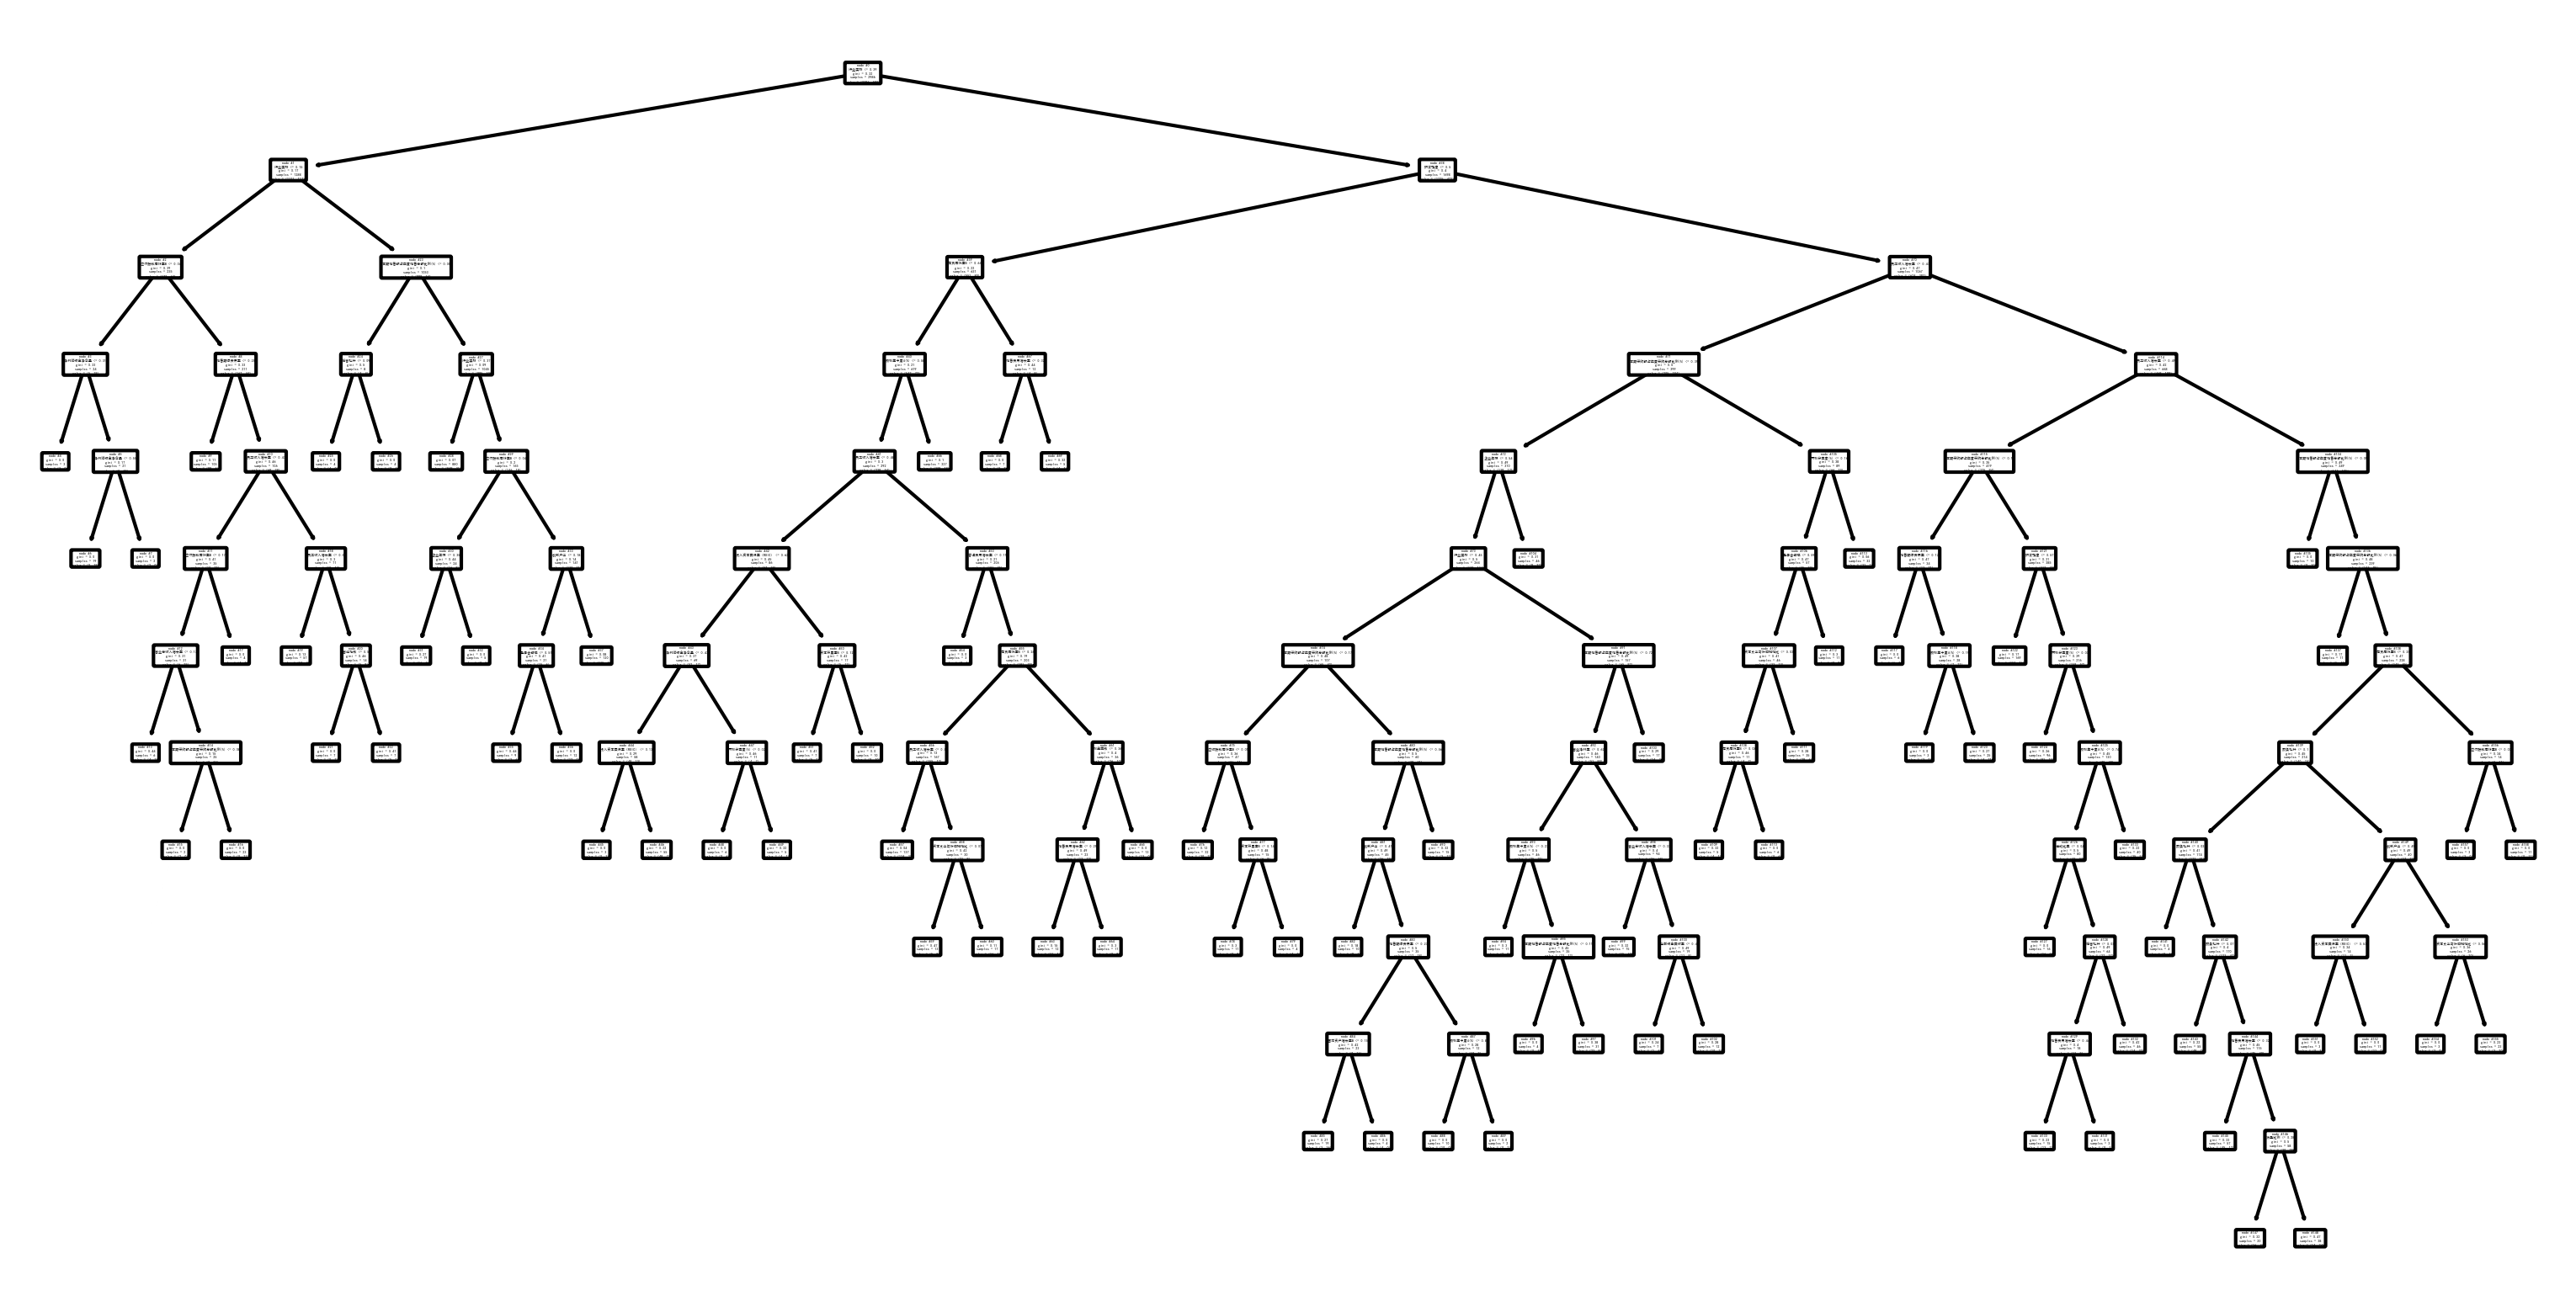

In [9]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 5),dpi=300)
ax = fig.add_axes([0,0,1,1])
plot_tree(model, feature_names=Xnames, node_ids=True, rounded=True, precision=2)
plt.show()

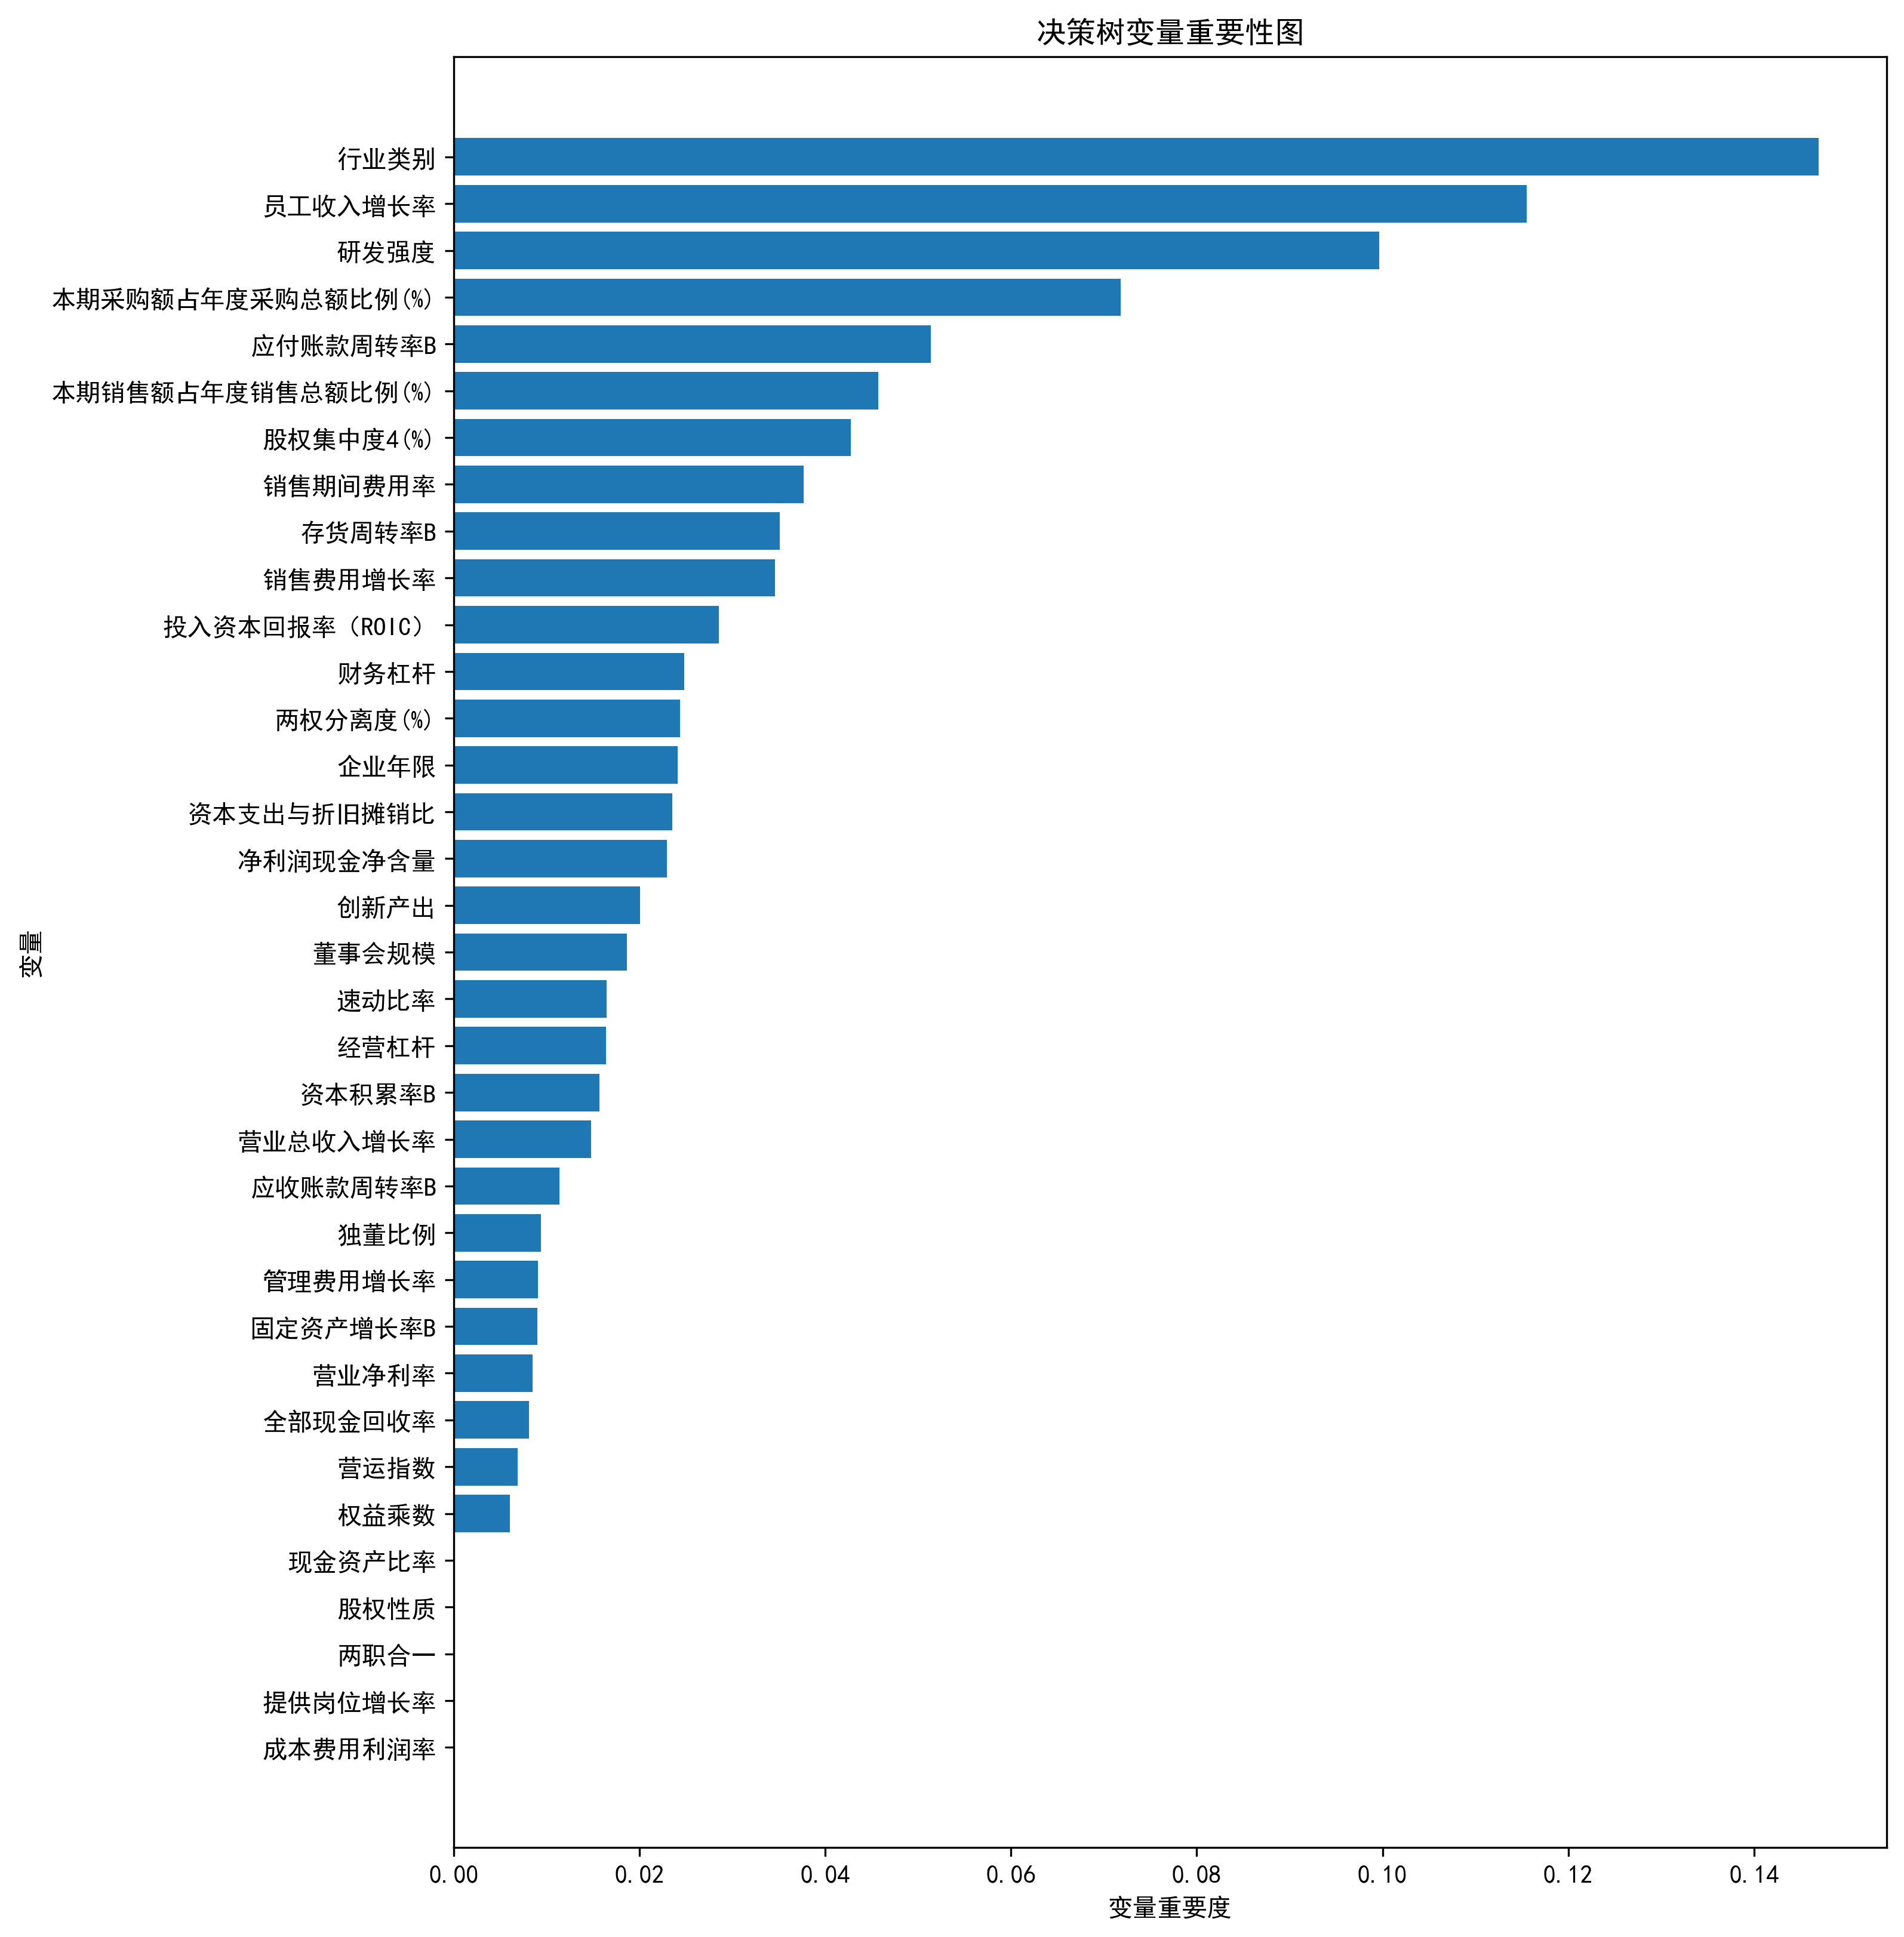

In [11]:
# 考察变量重要程度
import numpy as np

fig = plt.figure(figsize=(8, 10),dpi=300)
ax = fig.add_axes([0,0,1,1])
# model.feature_importances_
sorted_index = model.feature_importances_.argsort()
# X = pd.DataFrame(X, columns=names)
ax.barh(range(X.shape[1]), model.feature_importances_[sorted_index])
ax.set_yticks(np.arange(X.shape[1]), X.columns[sorted_index])
ax.set_xlabel('变量重要度')
ax.set_ylabel('变量')
plt.title('决策树变量重要性图')
# plt.savefig('./imgs/基于决策树预测数字化转型成都的变量重要性图.png',transparent=True, bbox_inches='tight', pad_inches=0.0)
plt.show()

In [20]:
# 在测试集中预测，展示混淆矩阵
from sklearn.metrics import cohen_kappa_score


def calculate(table):
    # 计算准确率与灵敏度
    table = np.array(table)
    Accuracy = (table[0, 0] + table[1, 0]) / np.sum(table)
    Sensitivity  = table[1, 1] / (table[1, 0] + table[1, 1])
    print(f"准确率Accuracy:{Accuracy}，灵敏度Sensitivity:{Sensitivity}。")
    return Accuracy,Sensitivity
    

pred = model.predict(X_test)
table = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
calculate(table)
cohen_kappa_score(y_test, pred)

准确率Accuracy:0.8433734939759037，灵敏度Sensitivity:0.45。


0.3777145811789038

灵敏度的含义，表明预测值与实际值的一致性一般，虽然预测的准确率高达84.34%，但是只能成功识别45%是是数字化转型的企业，这或许是因为数字化转型企业在所有企业中占比只有19.59导致的，因为即使模型将所有结果全部预测为非数字化转型企业，其准确率也高达80.41%。
可以尝试进一步提高数字化转型企业的数量提升模型的说服力。

In [21]:
prob = model.predict_proba(X_test)
# 测试集中非数字化转型企业的概率：数字化转型企业的概率
# model.classes_
prob_yes = prob[:,1]
pred_new = (prob_yes>0.1)
table_ = pd.crosstab(y_test,pred_new,rownames=['actual'], colnames=['Predicted'])
table = np.array(table_)
calculate(table)
# 准确度降低了，但是灵敏度却升高了，决策树算法此时可以识别66.67%数字化转型企业。

准确率Accuracy:0.6536144578313253，灵敏度Sensitivity:0.6666666666666666。


(0.6536144578313253, 0.6666666666666666)

In [22]:
# 使用信息熵作为指数估计分类器。
# 十折交叉验证
param_grid_entry = {'ccp_alpha': path.ccp_alphas}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
model = GridSearchCV(DecisionTreeClassifier(random_state=132, criterion='entropy'), param_grid, cv=kfold)
model.fit(X_train, y_train)
print(model.best_params_, model.score(X_test, y_test))

{'ccp_alpha': 0.015494325122272723} 0.8192771084337349


InvalidParameterError: The 'ccp_alpha' parameter of DecisionTreeClassifier must be a float in the range [0.0, inf). Got array([0.        , 0.00031429, 0.0003152 , 0.00031967, 0.00032034,
       0.00032202, 0.00032373, 0.00032409, 0.00032443, 0.00032533,
       0.00032756, 0.00032833, 0.00032902, 0.00032931, 0.00033004,
       0.0003306 , 0.00033122, 0.00033306, 0.0003336 , 0.0003349 ,
       0.0003349 , 0.0003349 , 0.00035283, 0.00040657, 0.00044653,
       0.00044653, 0.00044653, 0.00044653, 0.00044653, 0.00044653,
       0.00044653, 0.00044653, 0.00044653, 0.00048766, 0.00050234,
       0.00050234, 0.00050234, 0.00050234, 0.00050234, 0.00053583,
       0.00053583, 0.00053583, 0.00053583, 0.00053583, 0.00055816,
       0.00055816, 0.00055816, 0.00057411, 0.00058375, 0.00058677,
       0.00058728, 0.00059537, 0.00059537, 0.00059929, 0.00060281,
       0.00060281, 0.00060767, 0.0006089 , 0.00061398, 0.00061827,
       0.00062089, 0.00062143, 0.00062279, 0.00062362, 0.00062514,
       0.00062514, 0.00062514, 0.00062514, 0.00063097, 0.00063111,
       0.0006379 , 0.00064185, 0.00064587, 0.00064819, 0.00065009,
       0.00065346, 0.00065964, 0.00067378, 0.00071445, 0.00071454,
       0.00075356, 0.00076548, 0.00076639, 0.00078825, 0.00079684,
       0.00080375, 0.00080375, 0.00080375, 0.00080375, 0.00083724,
       0.00083724, 0.00084876, 0.00086333, 0.00087364, 0.00088058,
       0.00088836, 0.00088847, 0.0008921 , 0.00089306, 0.00089306,
       0.0009048 , 0.00091725, 0.00095259, 0.00095685, 0.00095685,
       0.00095685, 0.00096303, 0.00096756, 0.00096951, 0.0009754 ,
       0.00098923, 0.00098923, 0.00102562, 0.0010274 , 0.00102964,
       0.0010419 , 0.0010588 , 0.00105913, 0.0010673 , 0.0010796 ,
       0.00109576, 0.00109602, 0.00109602, 0.00109602, 0.00109602,
       0.00110869, 0.00111109, 0.00111632, 0.00112196, 0.00112336,
       0.00116909, 0.00116909, 0.00117394, 0.00119606, 0.00121179,
       0.00121337, 0.00125028, 0.00125424, 0.00125772, 0.00126591,
       0.0012864 , 0.00131523, 0.00134406, 0.00135436, 0.00139218,
       0.00140713, 0.00141106, 0.00141177, 0.00143926, 0.00145809,
       0.00147346, 0.00151315, 0.0015433 , 0.00157418, 0.0015788 ,
       0.0015788 , 0.00169313, 0.00170551, 0.00172717, 0.00177049,
       0.0018551 , 0.00186163, 0.00186832, 0.00201484, 0.00202143,
       0.00231093, 0.00233382, 0.00238815, 0.00246894, 0.00381947,
       0.00383379, 0.00398112, 0.004074  , 0.00490801, 0.00593305,
       0.00604855, 0.01549433, 0.01728804]) instead.

In [23]:
model_entry =DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015494325122272723, random_state=132)
model_entry.fit(X_train, y_train)
model_entry.score(X_test, y_test)

0.8192771084337349

In [ ]:
pred = model.predict(X_test)
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

0.8143459915611815


C:\Envs\digital\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


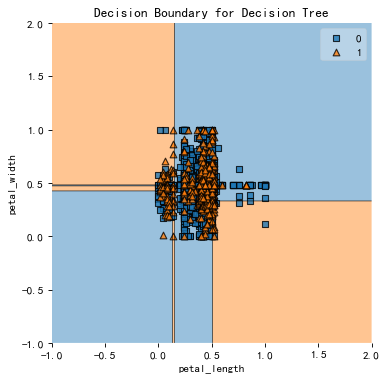

In [43]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(4, 4),dpi=80)
ax = fig.add_axes([0,0,1,1])

# 绘制决策边界只能有两个变量，我们选取最重要的两个变量吧
X2 = X[['行业类别','员工收入增长率']]  # '研发强度'
y = js_dataset[Ynames].values.ravel()
model = DecisionTreeClassifier(random_state=123)
path = model.cost_complexity_pruning_path(X2, y)
param_grid = {'ccp_alpha': path.ccp_alphas}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
model = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv=kfold)
model.fit(X2, y)
model.score(X2, y)
print(model.score(X2, y))
plot_decision_regions(np.array(X2), y, model)
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
# ax.set_title('Decision Boundary for Decision Tree')
plt.show()

决策树法的优点包括
1.简单直观：决策树模型可以直观地表示变量之间的关系，易于理解和解释。决策树可以通过一系列的问题和条件来进行分类和预测类似于人类的决策过程
2.可解释性强：决策树模型生成的规则集可以直接用于决策推理可以清晰地展示分类或预测的依据
3.数据预处理简单：决策树模型对数据的处理相对简单，可以处理包含缺失值的数据，不需要进行过多的数据预处理工作
4.能处理多类别问题：决策树模型可以处理多分类问题，不仅可以进行二分类，还可以进行多分类
5.对异常值和噪声的鲁棒性强：决策树模型对异常值和噪声的影响相对较小，可以有效地处理数据中的不规则情况。

然而，决策树法也存在一些缺点：
1.容易过拟合:决策树模型在处理复杂问题时容易产生过拟合现象特别是当决策树的深度较大时。过拟合会导致模型在训练集上表现良好，但在测试集上表现较差
2.对连续型变量处理不佳：决策树模型对连续型变量的处理较为复杂，往往需要进行离散化处理
3.对样本不平衡问题敏感：决策树模型对样本不平衡问题较为敏感，容易偏向于具有较多样本的类别。
4.不稳定性：决策树模型对输入数据的微小变化较为敏感，可能会导致生成不同的决策树，缺乏稳定性
5.高计算复杂度：在处理大规模数据集时，决策树模型的计算复杂度较高，训练和预测时间较长

决策树法适用范围主要包括以下几个方面：
1.分类问题：决策树模型适用于分类问题，可以根据一系列的特征进行分类。
2.预测问题：决策树模型也适用于预测问题，可以根据一系列的特征进行预测。
3.特征选择：决策树模型可以用于特征选择，通过分析每个特征的重要性来选择最优的特征集
4.多类别问题：决策树模型可以处理多类别问题，可以进行多分类
5.数据集包含缺失值：决策树模型对数据集中的缺失值相对不敏感可以直接处理包含缺失值的数据
6.数据集包含噪声：决策树模型对数据集中的噪声相对不敏感，可以有效地处理包含噪声的数据